In [1]:
from kohonen import Kohonen
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
def prewitt_filter (img, sh):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_res = []
    img_res.append(gray)
    img_res.append(img_prewittx)
    img_res.append(img_prewitty)
    img_res = np.array(img_res)
    
    if sh:
        fig = plt.figure()
        plt.gray()  # show the filtered result in grayscale
        ax1 = fig.add_subplot(121)  # left side
        ax2 = fig.add_subplot(122)  # right side

        ax1.imshow(img_prewittx)
        ax2.imshow(img_prewitty)
        plt.show()
    
    return img_res


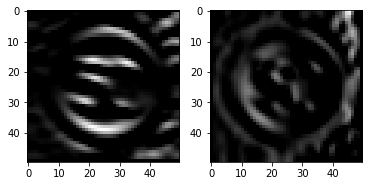

In [4]:
i1 = prewitt_filter(cv2.imread('1.png'), True)

In [5]:
VEC_LEN = 10800
DECAY_RATE = 0.95
MIN_ALPHA = 0.01
RADIUS_REDUCTION_POINT = 0.023  # Last 20% of iterations.

In [6]:
weights = {}
number_of_clusters = 13

for i in range(number_of_clusters):
    weight_list = np.zeros((10800), np.float32)

    weight_list[:] = [random.uniform(0.1, 0.9) for i in range(10800)]

    weights.update({i: weight_list})
weights

{0: array([0.34396857, 0.30669487, 0.16893183, ..., 0.20706417, 0.7912483 ,
        0.55366457], dtype=float32),
 1: array([0.8630634 , 0.24073532, 0.10328716, ..., 0.2802733 , 0.17324193,
        0.6343589 ], dtype=float32),
 2: array([0.87476015, 0.30574638, 0.28804383, ..., 0.62761396, 0.11299564,
        0.14283068], dtype=float32),
 3: array([0.62867   , 0.6699813 , 0.5782333 , ..., 0.35682595, 0.17410602,
        0.4306769 ], dtype=float32),
 4: array([0.47548667, 0.1736163 , 0.44488987, ..., 0.6367977 , 0.55096734,
        0.21040423], dtype=float32),
 5: array([0.6994807 , 0.28037614, 0.88949126, ..., 0.36335668, 0.7321213 ,
        0.7487233 ], dtype=float32),
 6: array([0.1899548 , 0.80596846, 0.5171136 , ..., 0.65686435, 0.5749174 ,
        0.7915253 ], dtype=float32),
 7: array([0.82186866, 0.8892095 , 0.3434077 , ..., 0.20268573, 0.57531005,
        0.464579  ], dtype=float32),
 8: array([0.85731745, 0.7281761 , 0.7541506 , ..., 0.2238564 , 0.28738925,
        0.79661673],

In [7]:
path = "./data/SOM"
# path = "./IMG/test"
files = [ f for f in listdir(path) if isfile(join(path,f)) ]
images = np.empty(len(files), dtype=object)

for n in range(0, len(files)):
    image = cv2.imread(join(path, files[n]))
    image = cv2.resize(image, (60, 60)) 
    img = np.array(prewitt_filter(image, False)) / 255
    images[n] = np.array(img).flatten()#np.array(img_canny).flatten()
# images

In [8]:
clusters = []
names = []

centres = weights
for name in centres:
    clusters.append(centres[name])
    names.append(name)
clusters

[array([0.34396857, 0.30669487, 0.16893183, ..., 0.20706417, 0.7912483 ,
        0.55366457], dtype=float32),
 array([0.8630634 , 0.24073532, 0.10328716, ..., 0.2802733 , 0.17324193,
        0.6343589 ], dtype=float32),
 array([0.87476015, 0.30574638, 0.28804383, ..., 0.62761396, 0.11299564,
        0.14283068], dtype=float32),
 array([0.62867   , 0.6699813 , 0.5782333 , ..., 0.35682595, 0.17410602,
        0.4306769 ], dtype=float32),
 array([0.47548667, 0.1736163 , 0.44488987, ..., 0.6367977 , 0.55096734,
        0.21040423], dtype=float32),
 array([0.6994807 , 0.28037614, 0.88949126, ..., 0.36335668, 0.7321213 ,
        0.7487233 ], dtype=float32),
 array([0.1899548 , 0.80596846, 0.5171136 , ..., 0.65686435, 0.5749174 ,
        0.7915253 ], dtype=float32),
 array([0.82186866, 0.8892095 , 0.3434077 , ..., 0.20268573, 0.57531005,
        0.464579  ], dtype=float32),
 array([0.85731745, 0.7281761 , 0.7541506 , ..., 0.2238564 , 0.28738925,
        0.79661673], dtype=float32),
 array([0.

Epoch: 1 | Progress: 100% | Alpha: 0.6 | Eps: 0.01
Epoch: 2 | Progress: 100% | Alpha: 0.57 | Eps: 0.01
Epoch: 3 | Progress: 100% | Alpha: 0.5415 | Eps: 0.01
Epoch: 4 | Progress: 100% | Alpha: 0.5144 | Eps: 0.01
Epoch: 5 | Progress: 100% | Alpha: 0.4887 | Eps: 0.01
Epoch: 6 | Progress: 100% | Alpha: 0.4643 | Eps: 0.01
Epoch: 7 | Progress: 100% | Alpha: 0.4411 | Eps: 0.01
Epoch: 8 | Progress: 100% | Alpha: 0.419 | Eps: 0.01
Epoch: 9 | Progress: 100% | Alpha: 0.3981 | Eps: 0.01
Epoch: 10 | Progress: 100% | Alpha: 0.3781 | Eps: 0.01
Epoch: 11 | Progress: 100% | Alpha: 0.3592 | Eps: 0.01
Epoch: 12 | Progress: 100% | Alpha: 0.3413 | Eps: 0.01
Epoch: 13 | Progress: 100% | Alpha: 0.3242 | Eps: 0.01
Epoch: 14 | Progress: 100% | Alpha: 0.308 | Eps: 0.01
Epoch: 15 | Progress: 100% | Alpha: 0.2926 | Eps: 0.01
Epoch: 16 | Progress: 100% | Alpha: 0.278 | Eps: 0.01
Epoch: 17 | Progress: 100% | Alpha: 0.2641 | Eps: 0.01
Epoch: 18 | Progress: 100% | Alpha: 0.2509 | Eps: 0.01
Epoch: 19 | Progress: 100% 

Vector 119 fits into category 3
Vector 120 fits into category 10
Vector 121 fits into category 3
Vector 122 fits into category 10
Vector 123 fits into category 10
Vector 124 fits into category 10
Vector 125 fits into category 10
Vector 126 fits into category 10
Vector 127 fits into category 10
Vector 128 fits into category 10
Vector 129 fits into category 10
Vector 130 fits into category 12
Vector 131 fits into category 10
Vector 132 fits into category 10
Vector 133 fits into category 10
Vector 134 fits into category 10
Vector 135 fits into category 10
Vector 136 fits into category 0
Vector 137 fits into category 10
Vector 138 fits into category 10
Vector 139 fits into category 8
Vector 140 fits into category 11
Vector 141 fits into category 12
Vector 142 fits into category 10
Vector 143 fits into category 10
Vector 144 fits into category 10
Vector 145 fits into category 10
Vector 146 fits into category 11
Vector 147 fits into category 11
Vector 148 fits into category 8
Vector 149 fits

<Figure size 1440x1440 with 0 Axes>

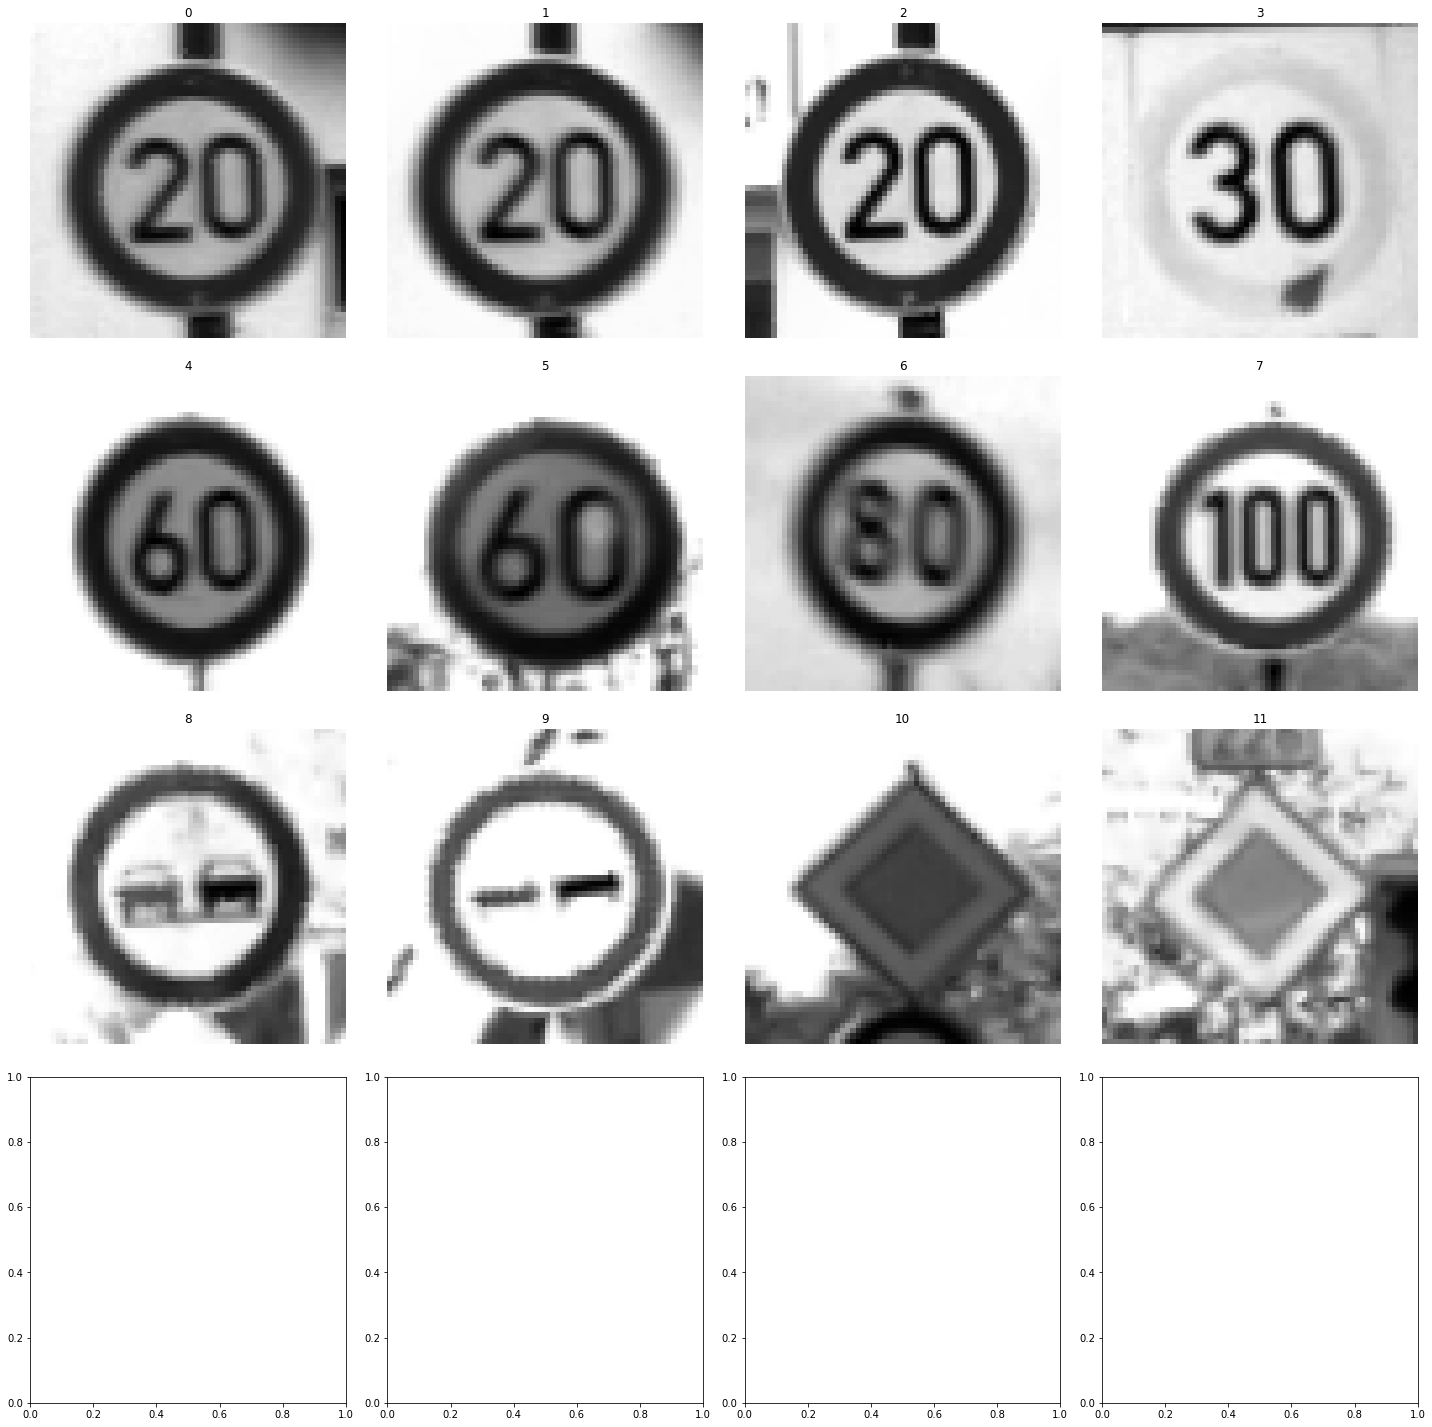

CLUSTER: 1


<Figure size 1440x1440 with 0 Axes>

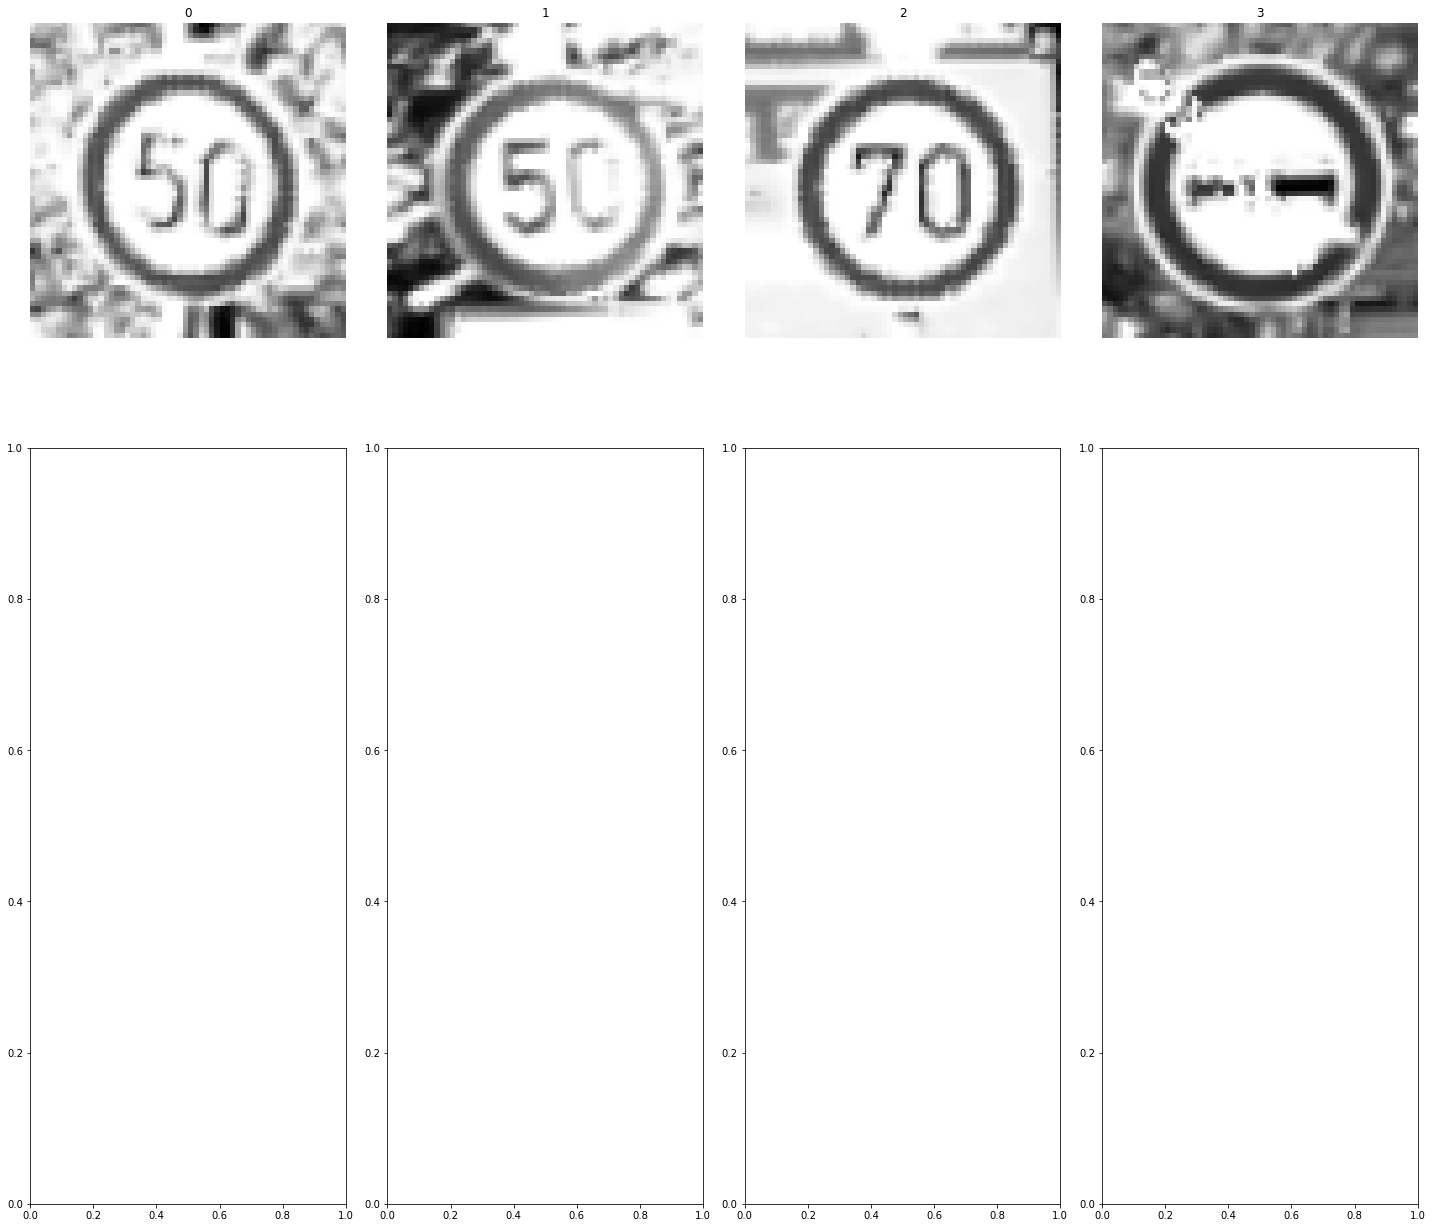

CLUSTER: 2


<Figure size 1440x1440 with 0 Axes>

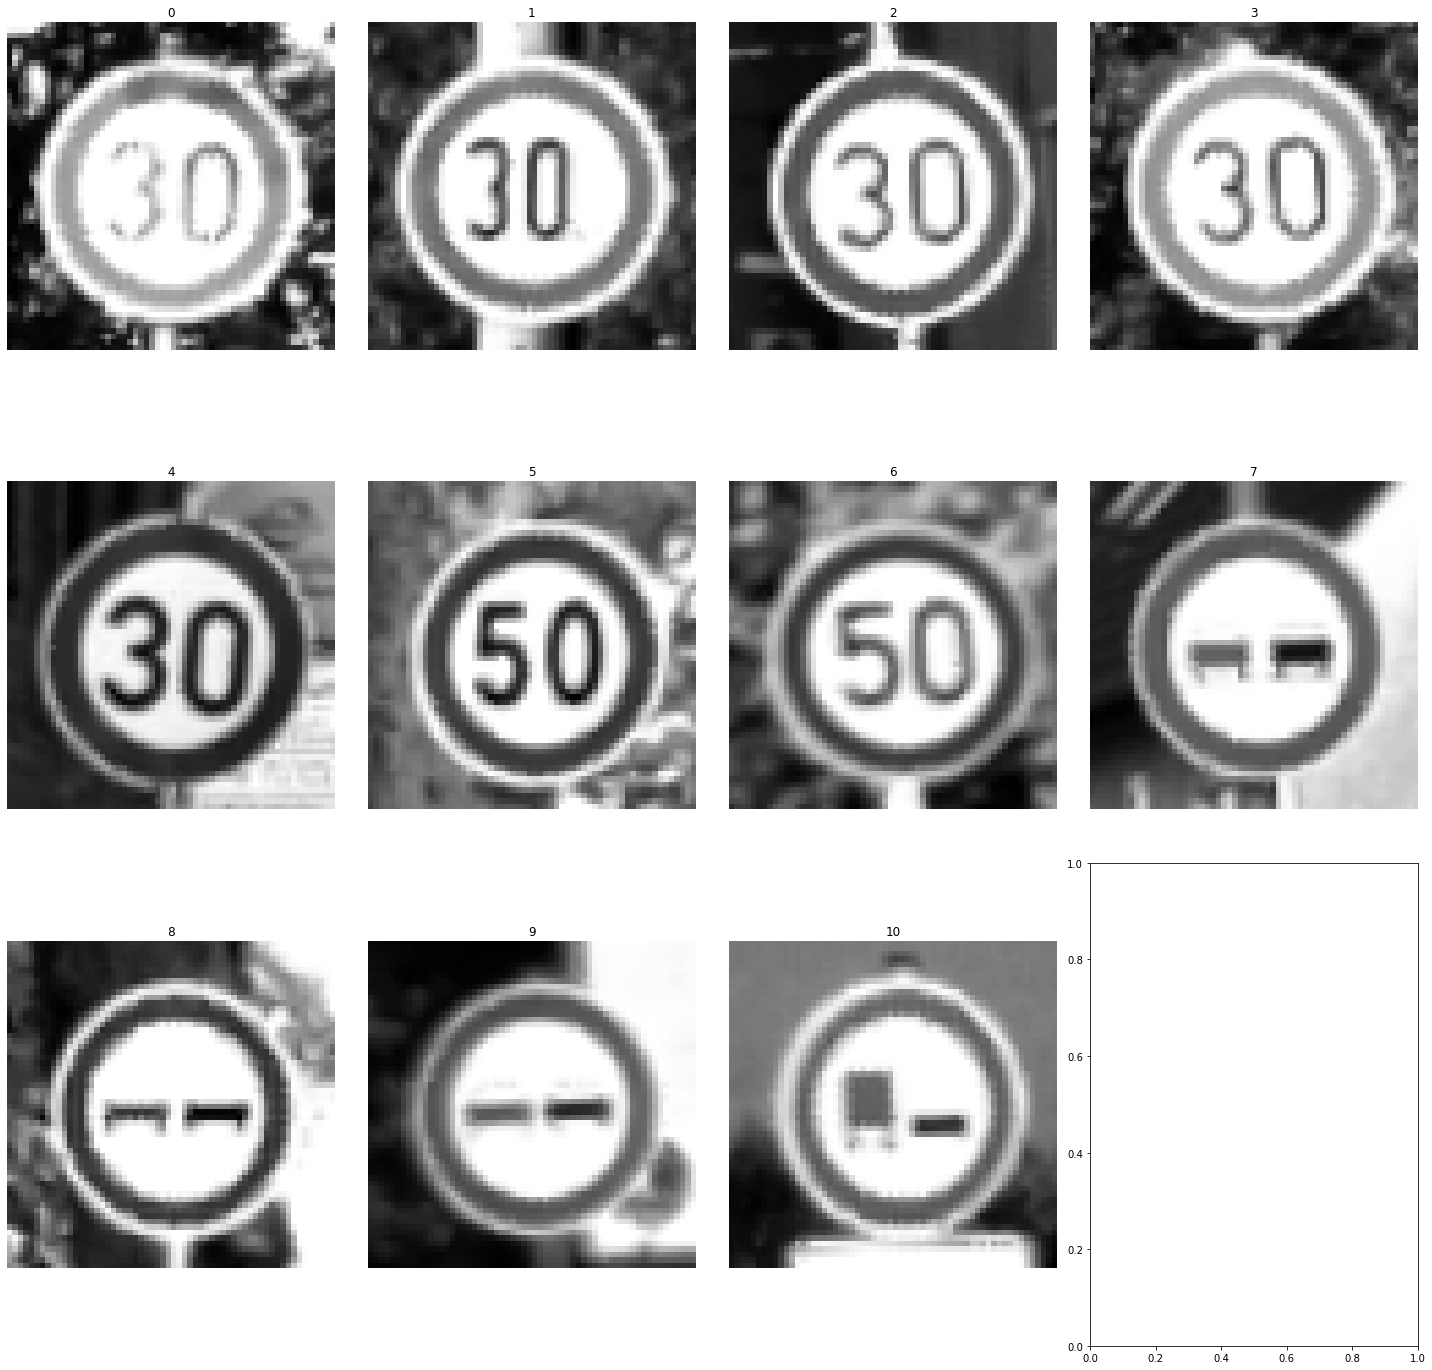

CLUSTER: 3


<Figure size 1440x1440 with 0 Axes>

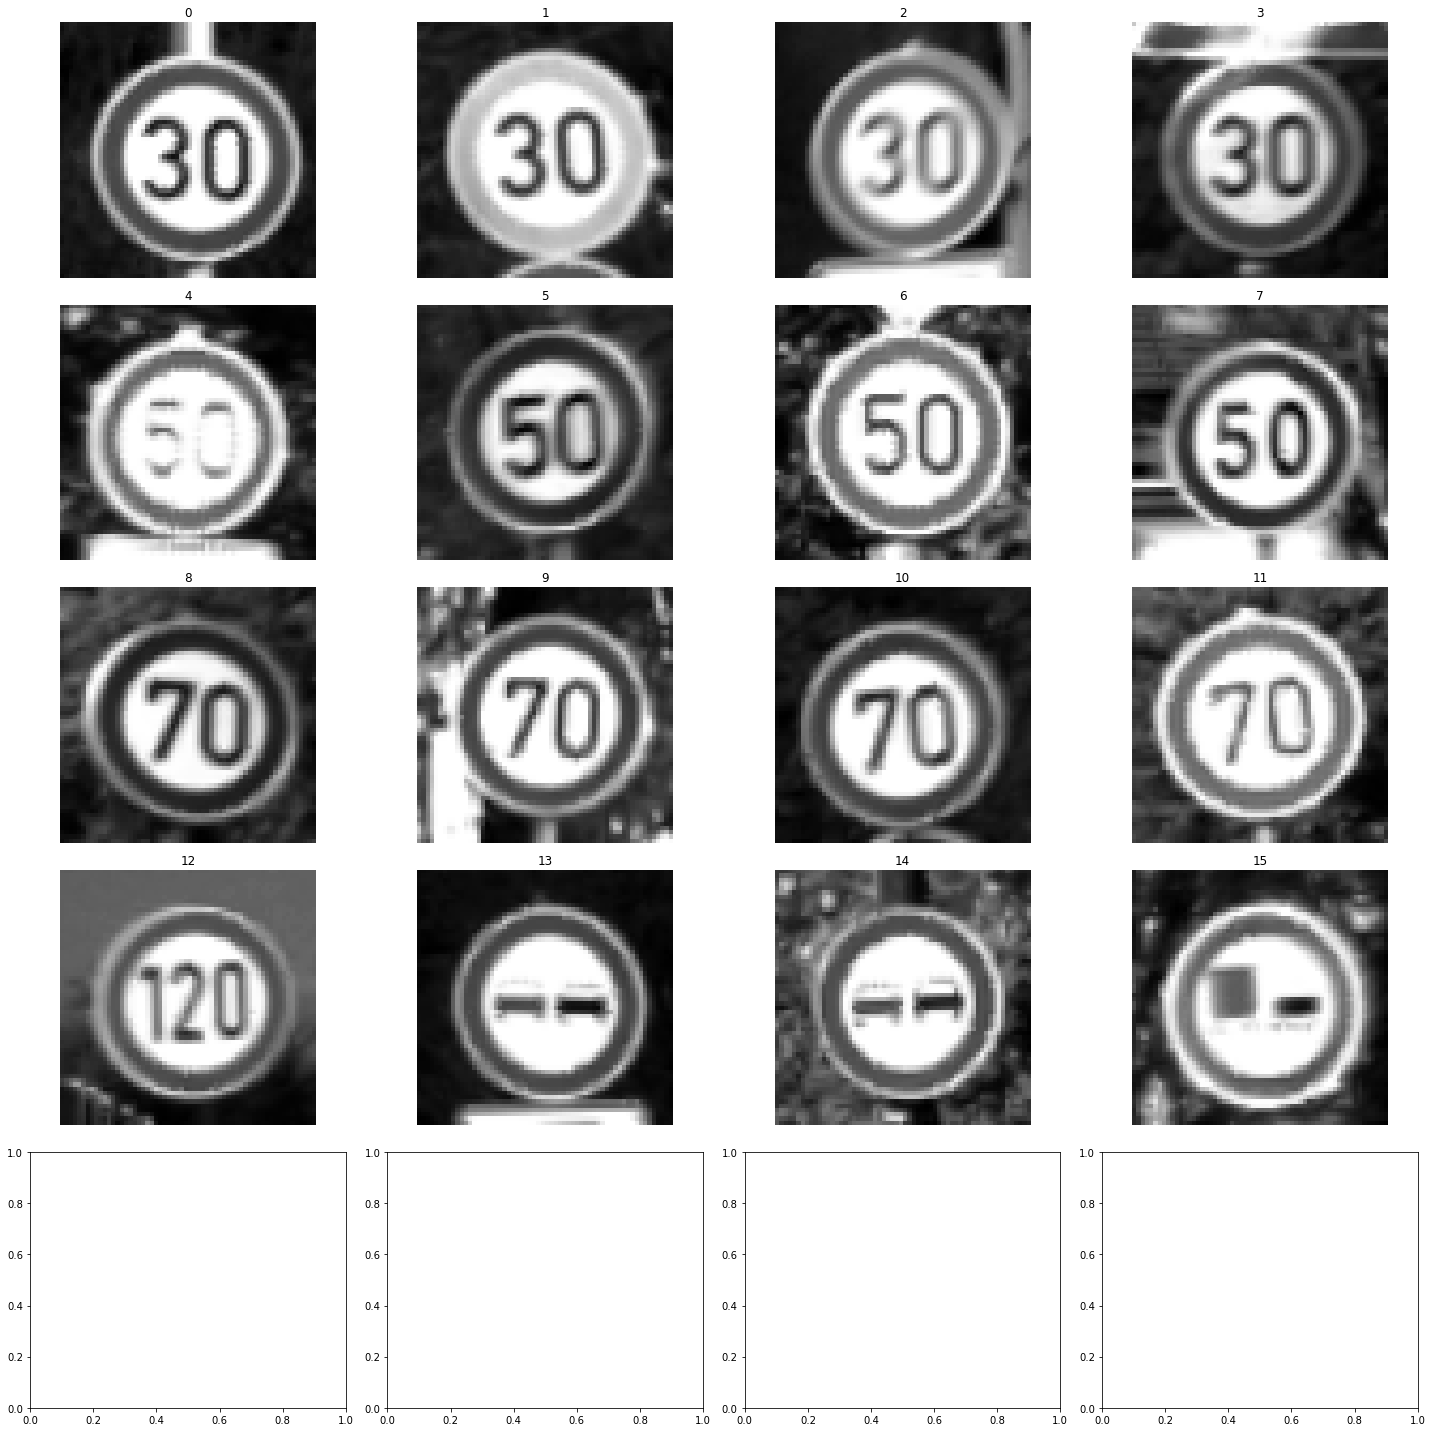

CLUSTER: 4


<Figure size 1440x1440 with 0 Axes>

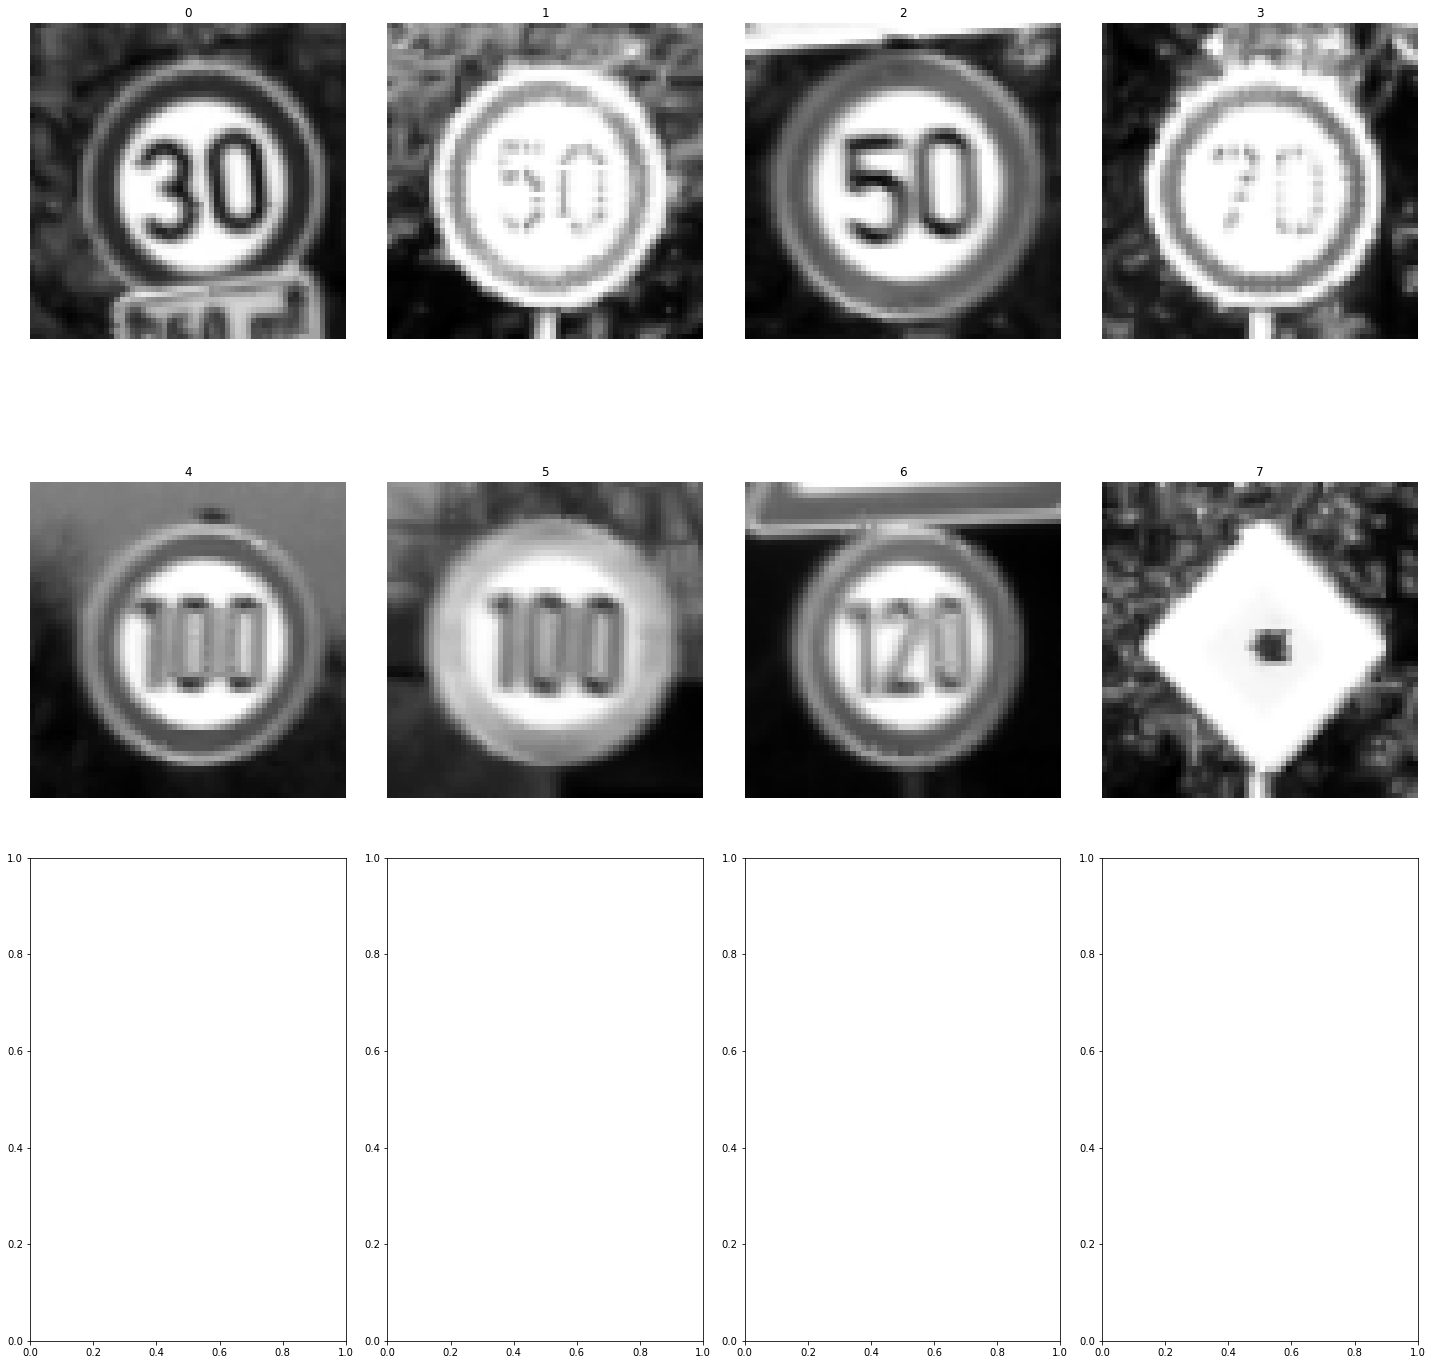

CLUSTER: 5


<Figure size 1440x1440 with 0 Axes>

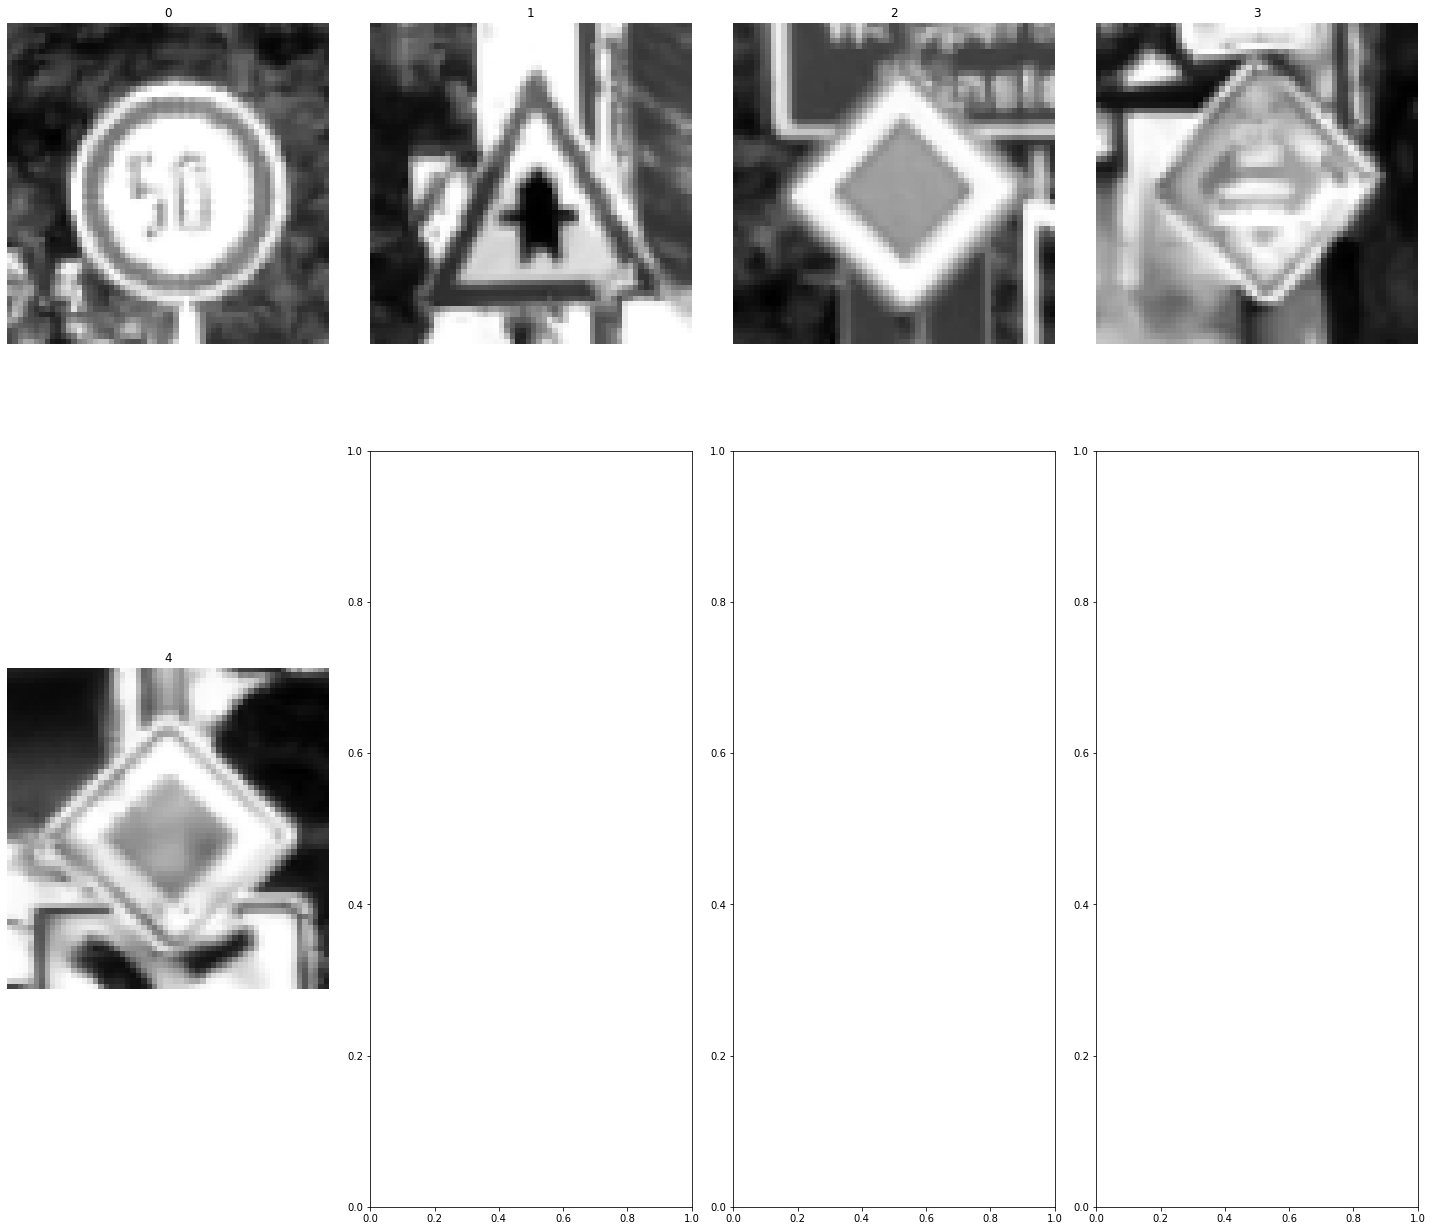

CLUSTER: 6


<Figure size 1440x1440 with 0 Axes>

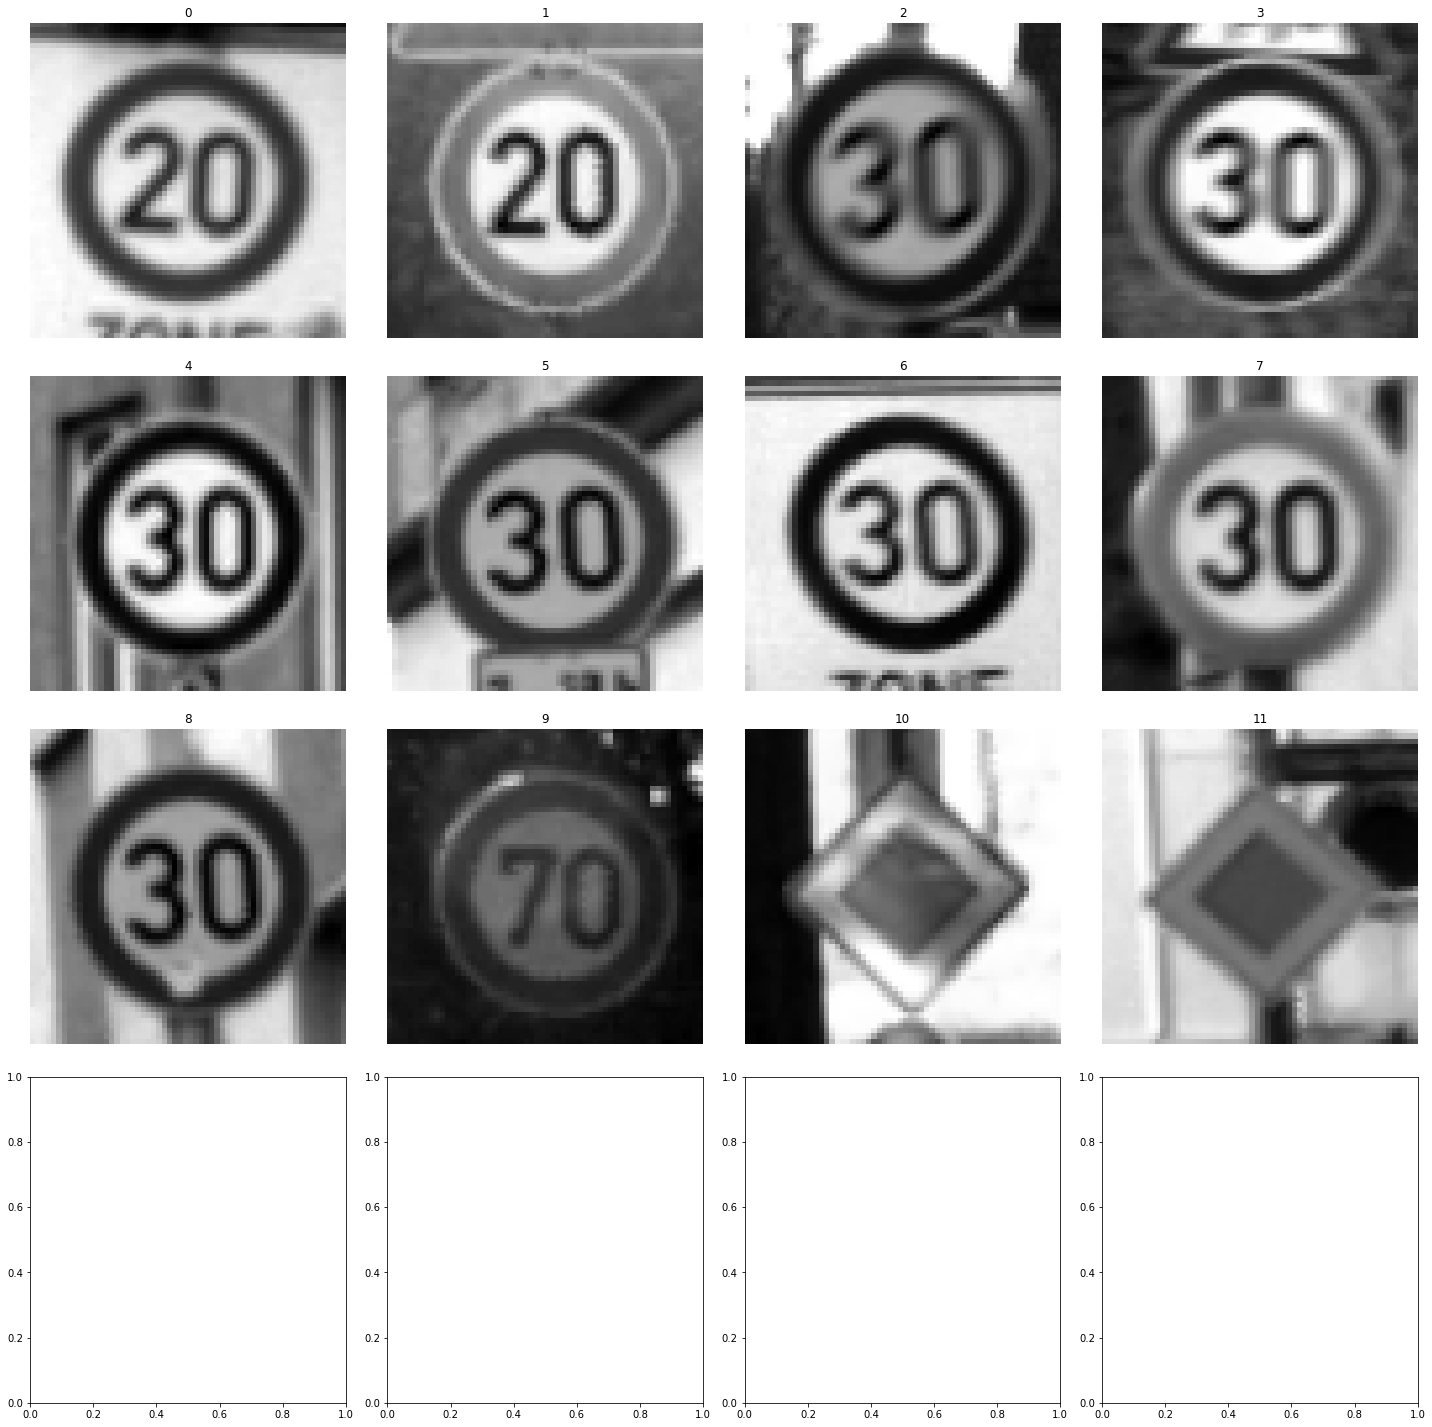

CLUSTER: 7


<Figure size 1440x1440 with 0 Axes>

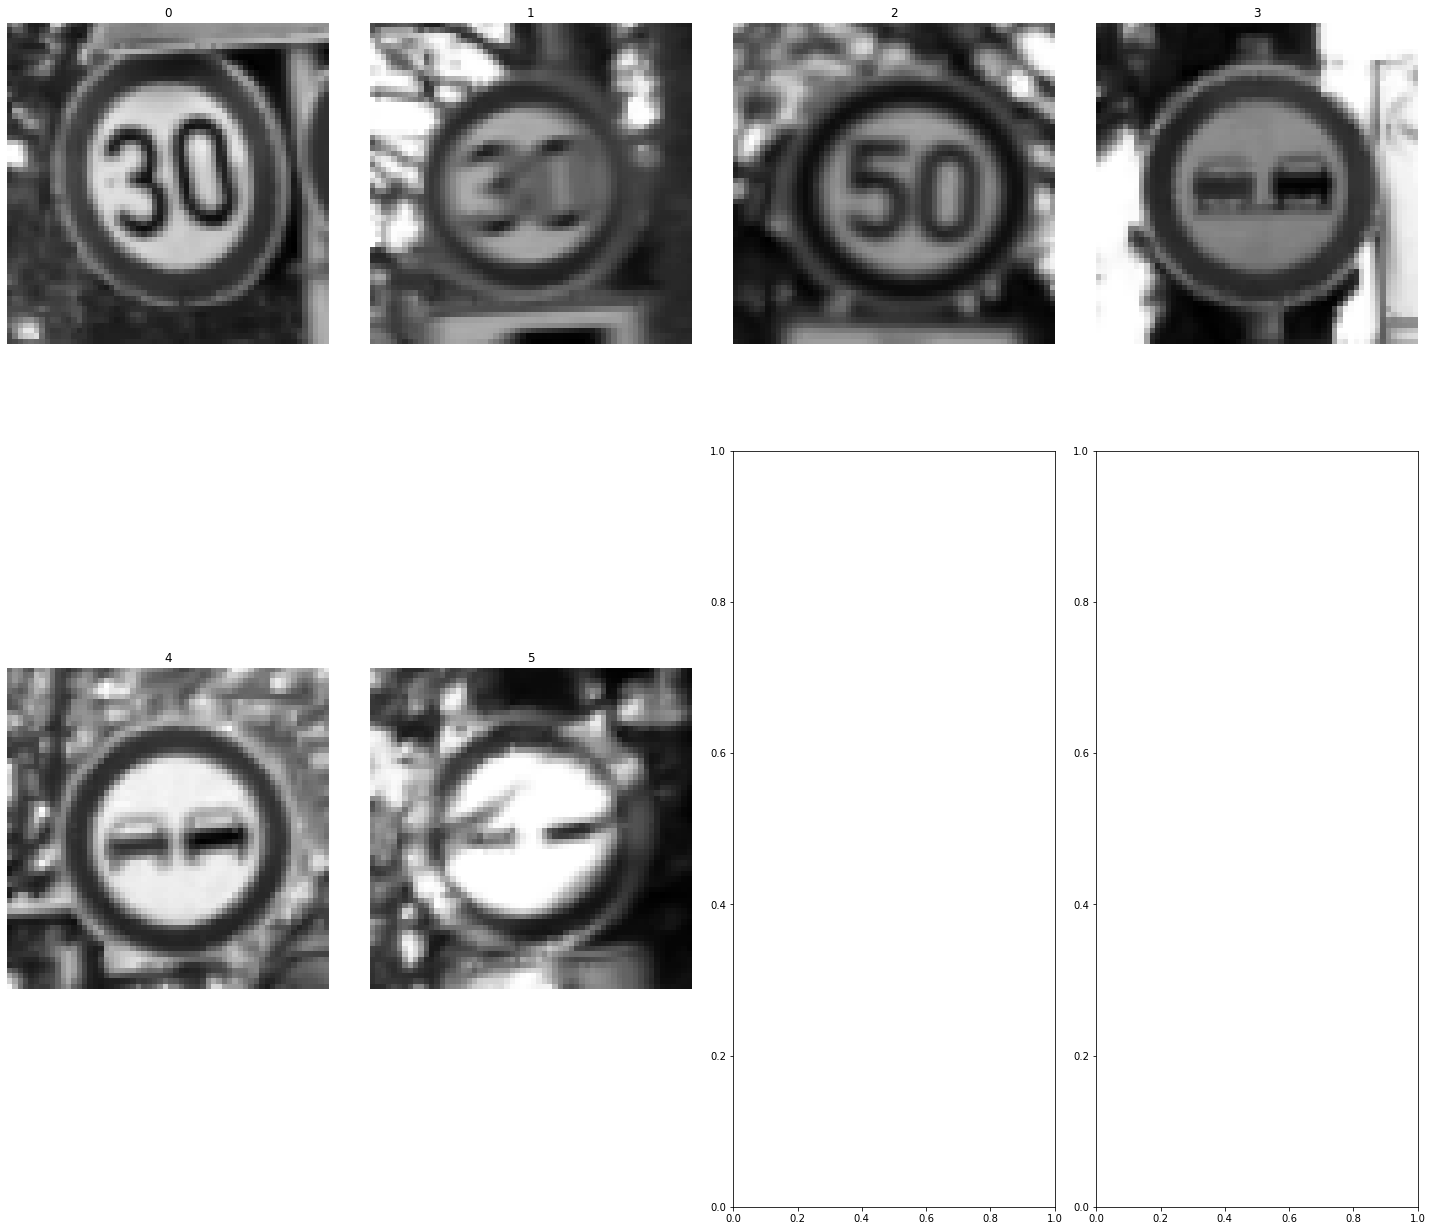

CLUSTER: 8


<Figure size 1440x1440 with 0 Axes>

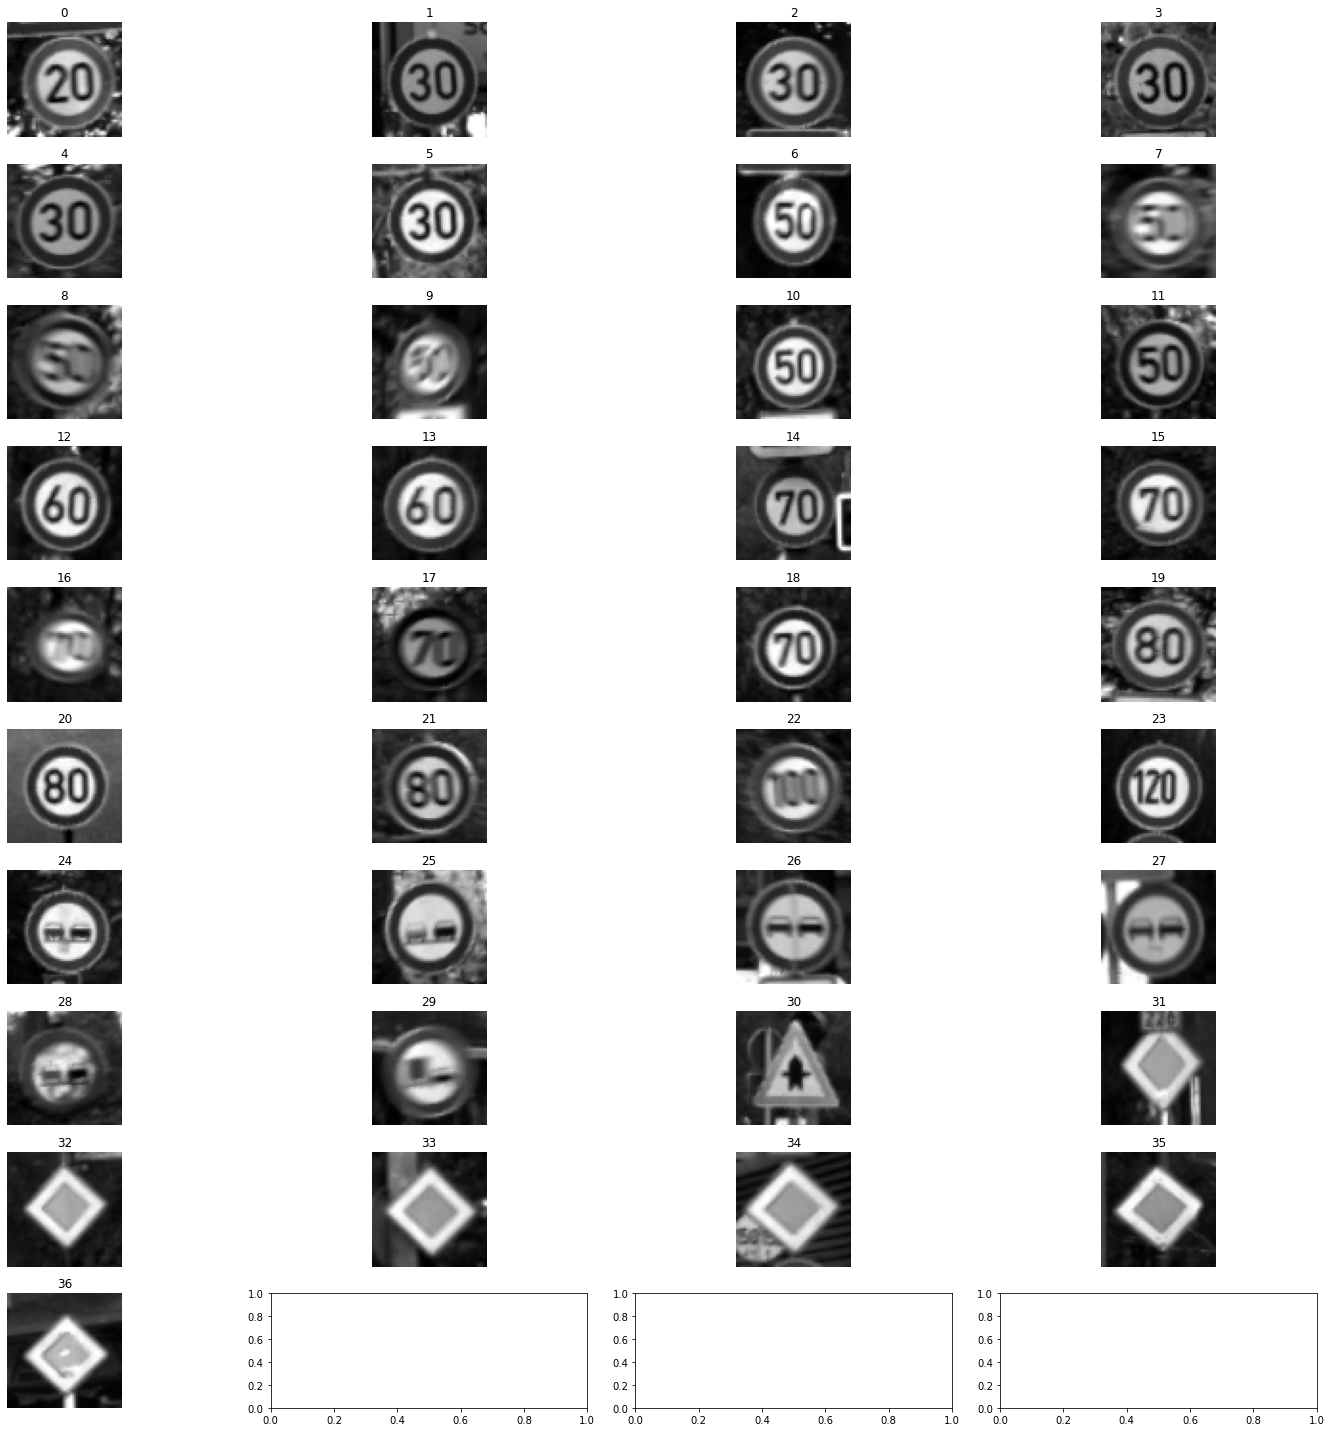

CLUSTER: 9


<Figure size 1440x1440 with 0 Axes>

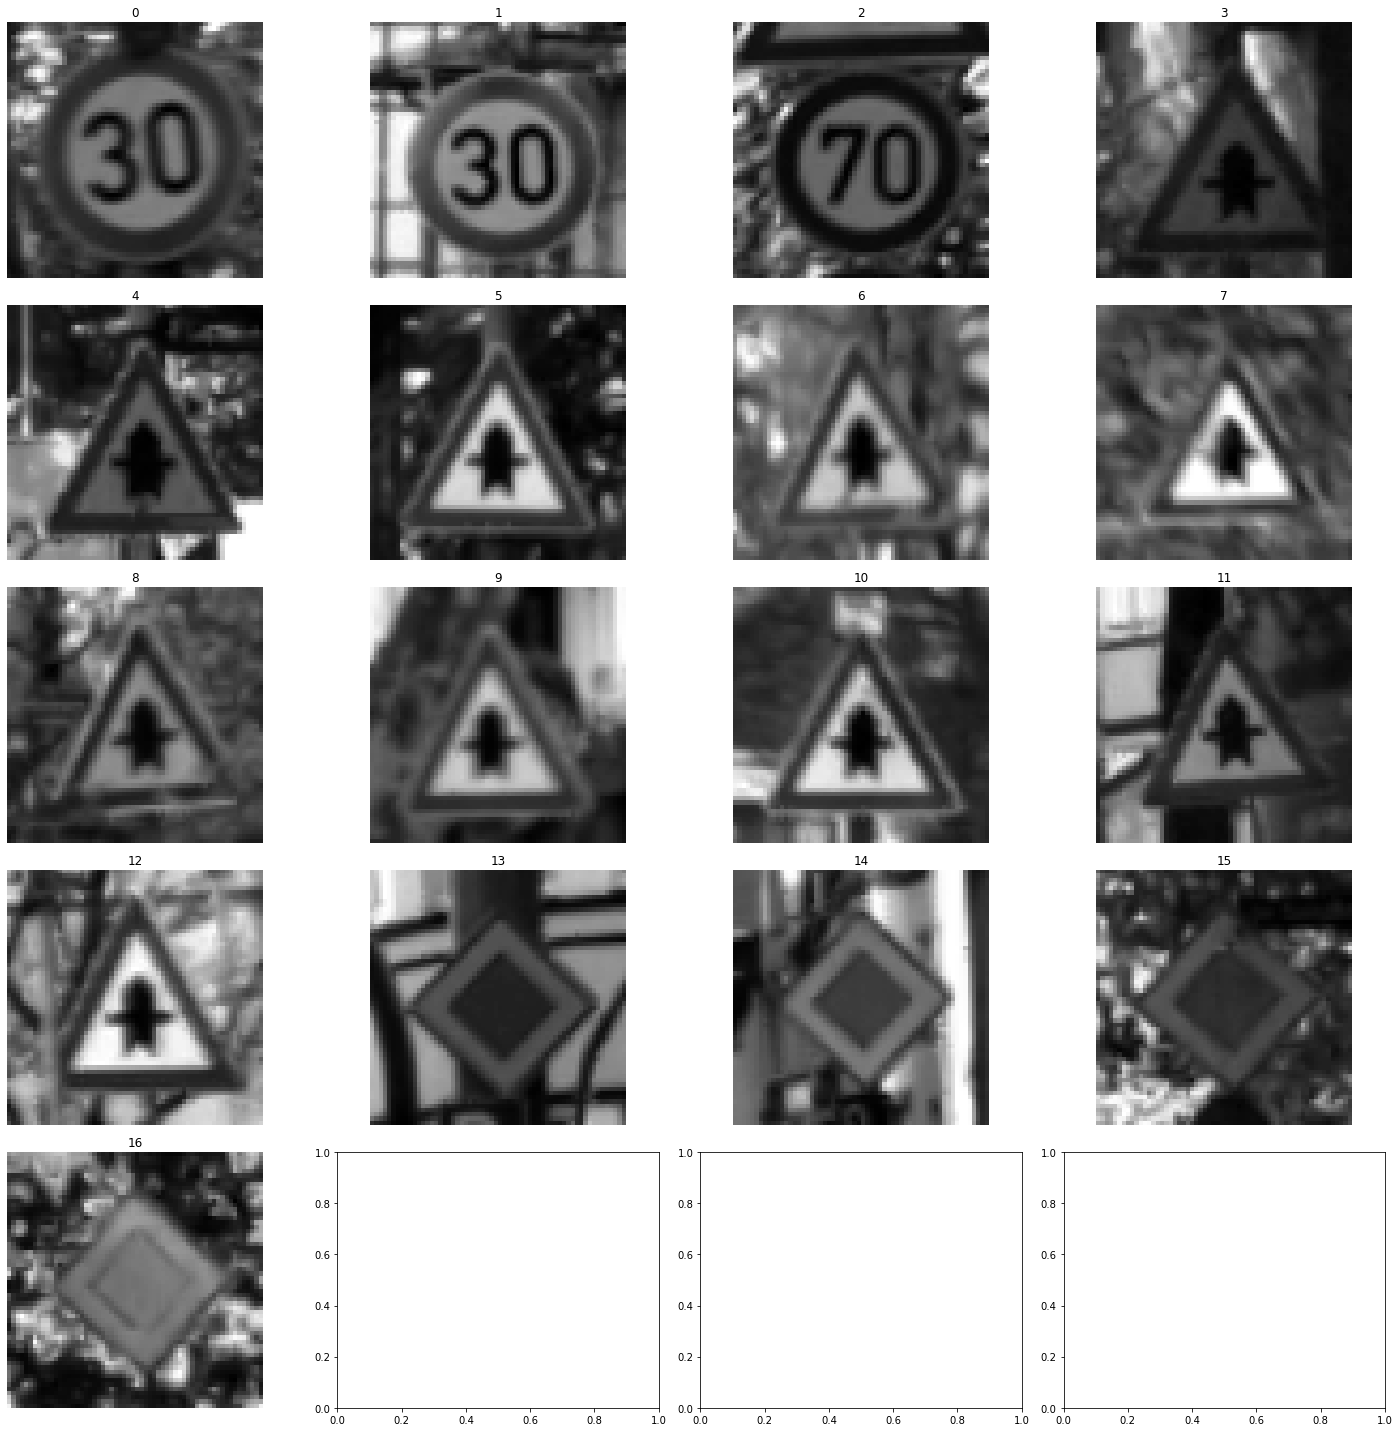

CLUSTER: 10


<Figure size 1440x1440 with 0 Axes>

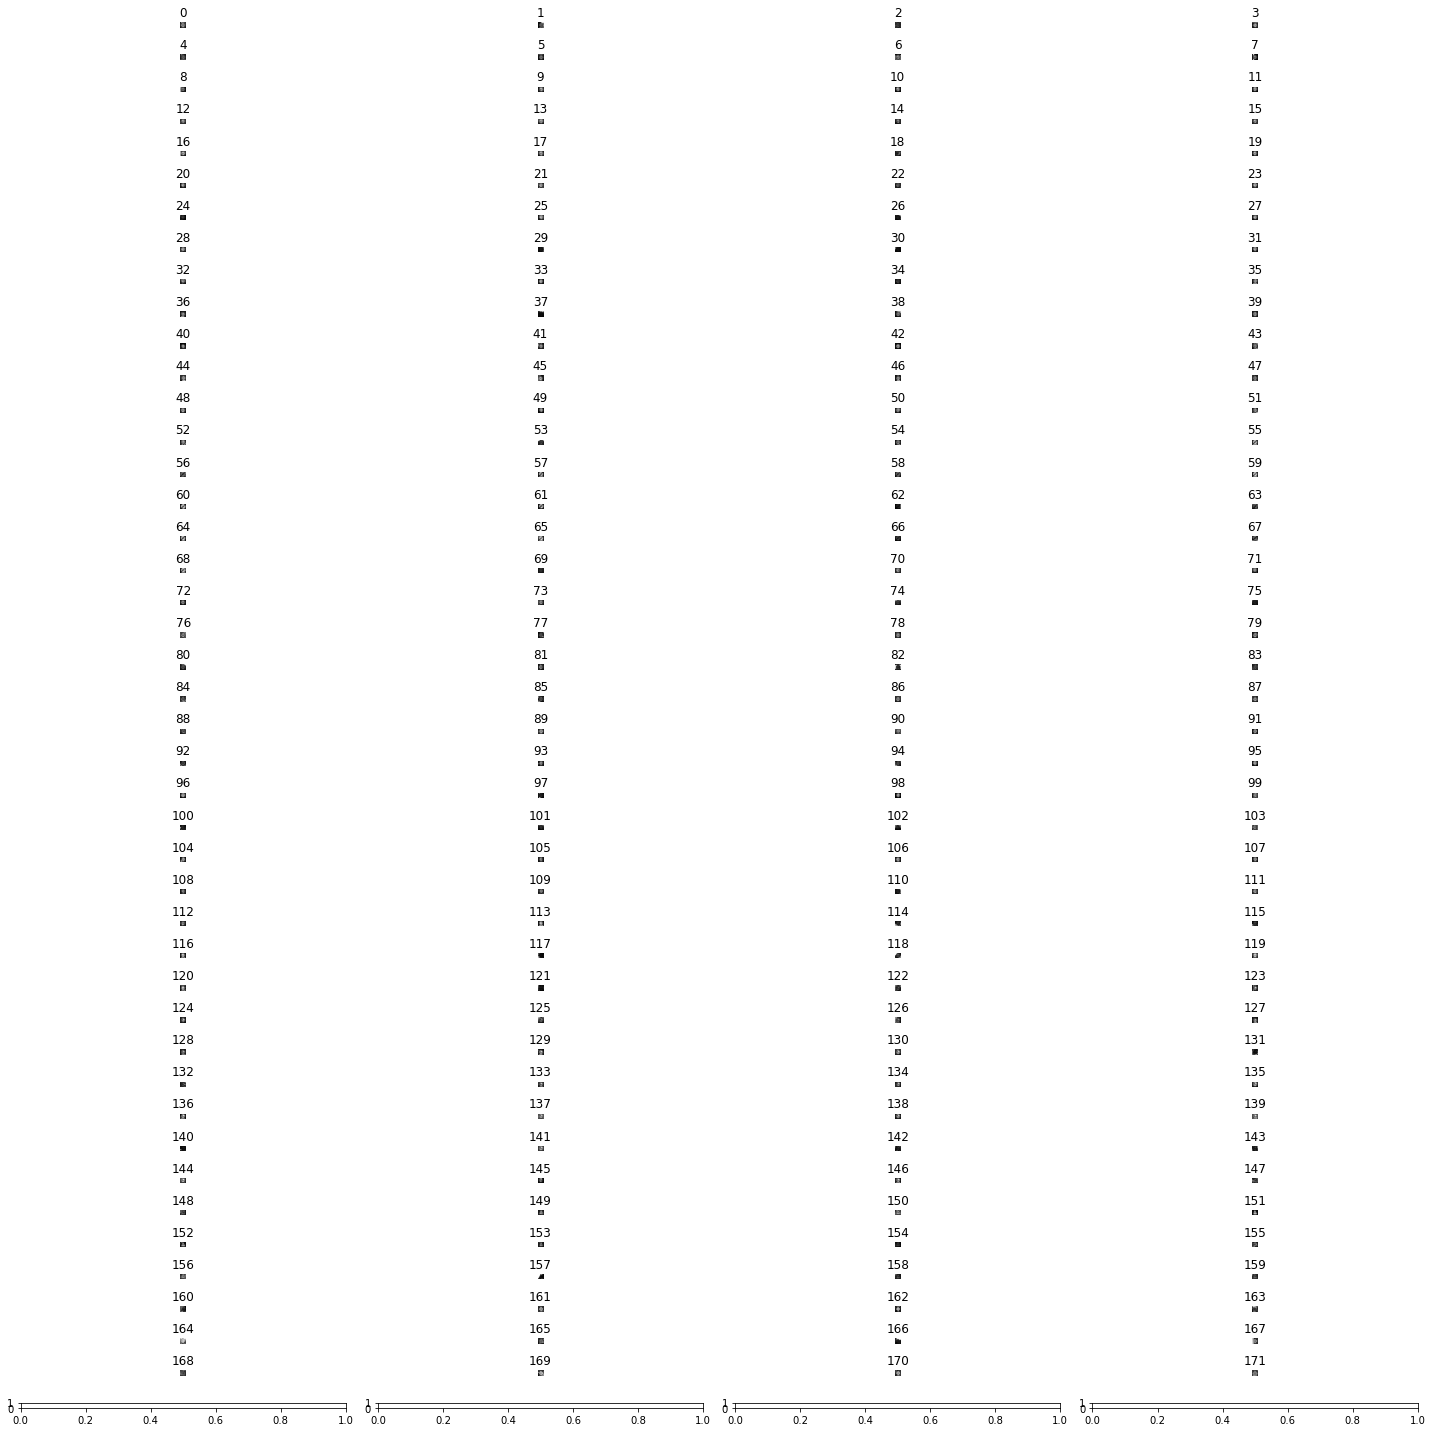

CLUSTER: 11


<Figure size 1440x1440 with 0 Axes>

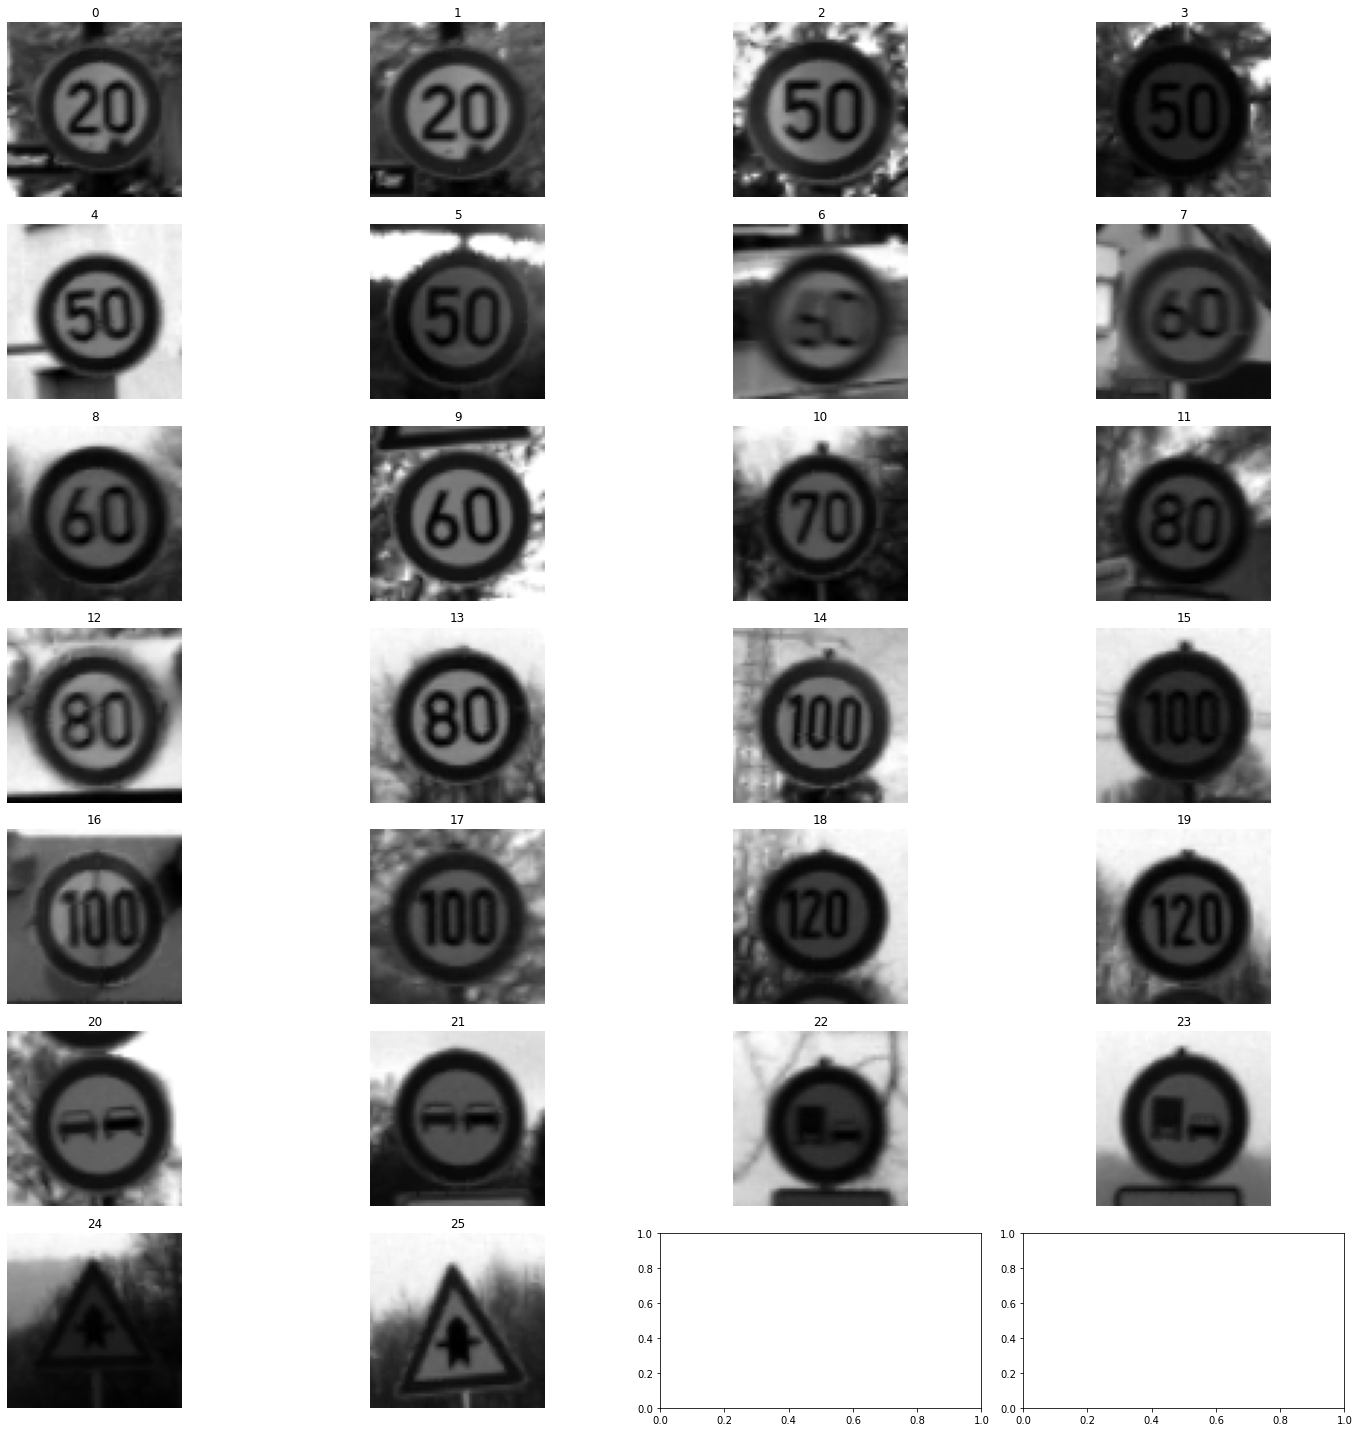

CLUSTER: 12


<Figure size 1440x1440 with 0 Axes>

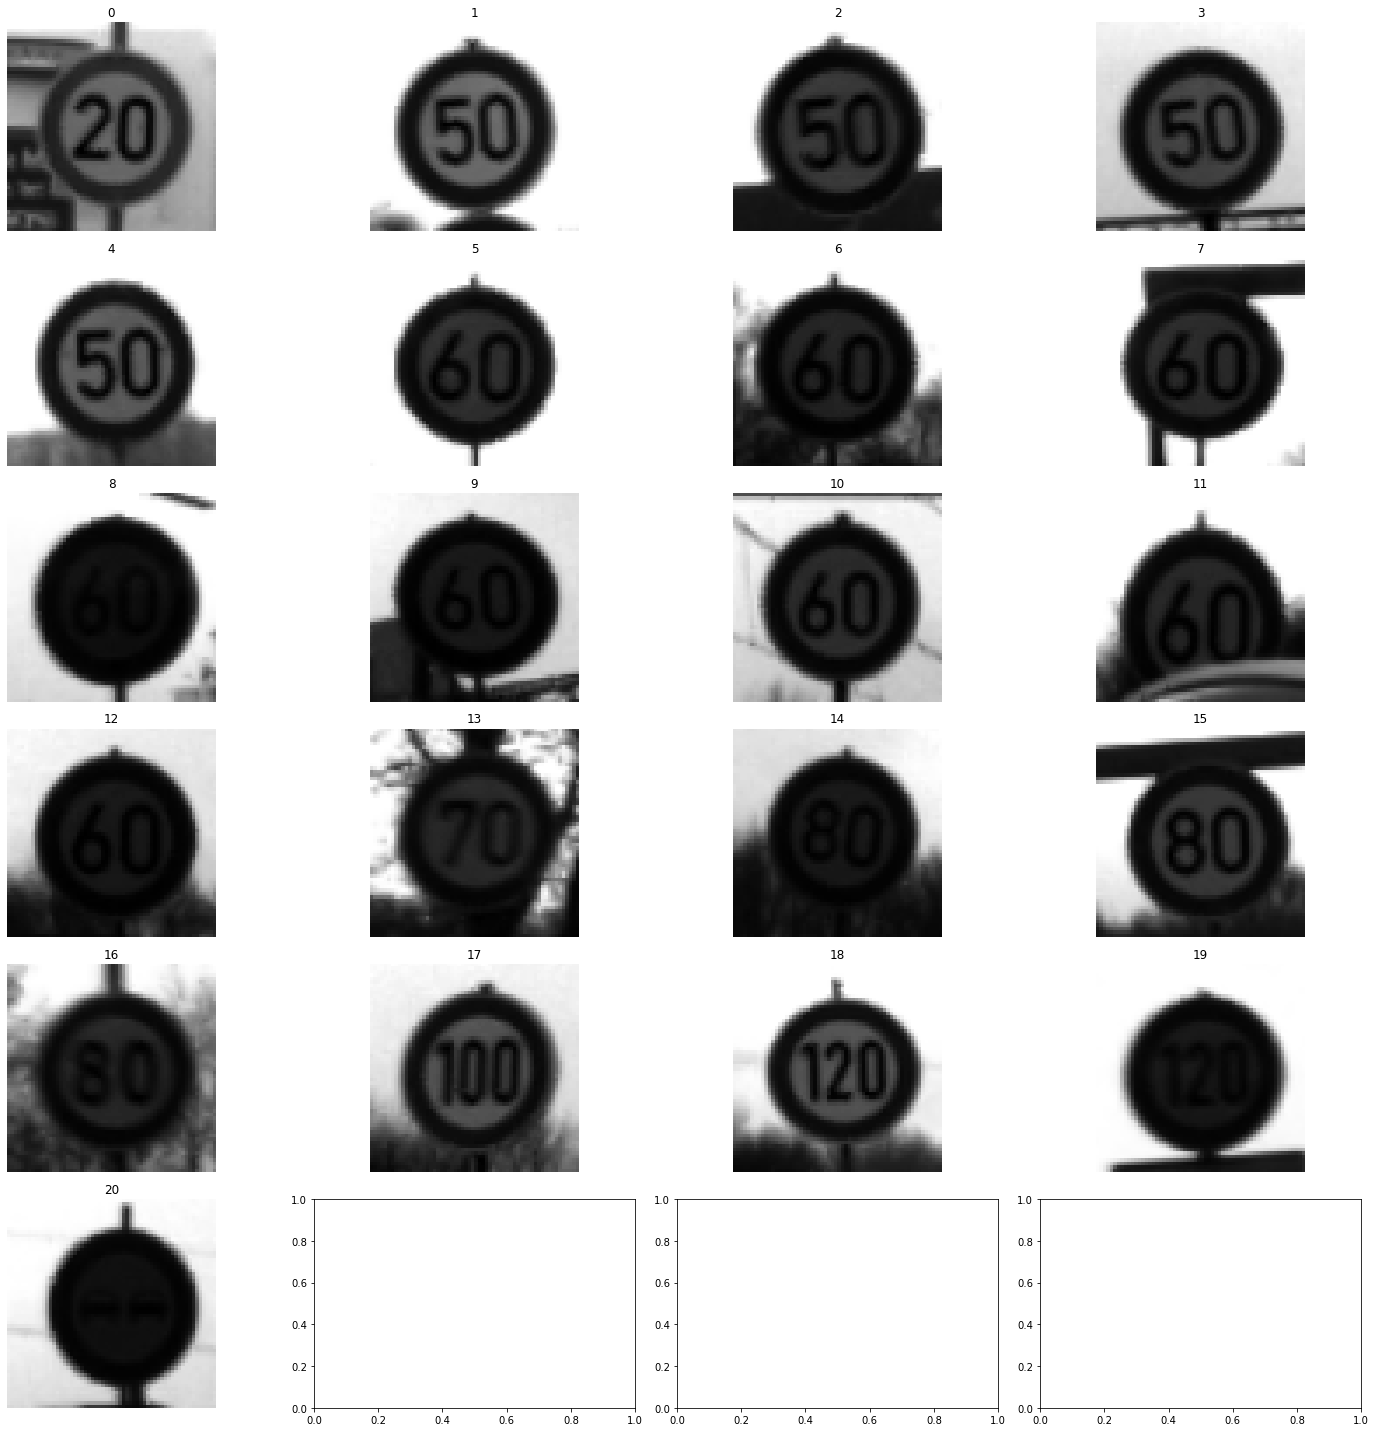

In [9]:
from kohonen import Kohonen

total_number = len(images)
vectors = []

kohonen = Kohonen(VEC_LEN, len(clusters), len(images), MIN_ALPHA, DECAY_RATE, RADIUS_REDUCTION_POINT, clusters, vectors, names)
kohonen.training(images)
result = kohonen.print_results(images)


plt.rcParams["figure.figsize"] = (20, 20)

def display_multiple_img(images, rows, cols):
    plt.gray()
    figure, ax = plt.subplots(nrows=rows, ncols=cols)
    for i in range(len(images)):
        ax.ravel()[i].imshow(images[i])
        ax.ravel()[i].set_title(i)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

cols = 4
for i, _ in enumerate(clusters):
    print("CLUSTER: " + str(i))
    rows = int(len(result[i]) / cols) + 1
    processed_images =  [img[0:3600].reshape(60, 60, 1) for img in result[i]]
    num = 0
    for k in range(len(processed_images)):        
        cv2.imwrite('data/class_' + str(i) + '/' + str(num) + '.png',processed_images[k]*255)
        num = num + 1
    if(len(processed_images) > 0):
        display_multiple_img(processed_images, rows, cols)
    else:
        print("cluster is empty")